In [1]:
import numpy as np
import sep

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import astropy.io.fits
from astropy.utils.data import download_file

%matplotlib inline

rcParams['figure.figsize'] = [10.,8.]

In [3]:
#download the image
data = download_file('https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')

In [4]:
#read image into standard 2-d numpy array
hdu_list = astropy.io.fits.open(data)
image_data = hdu_list[0].data
hdu_list.close()

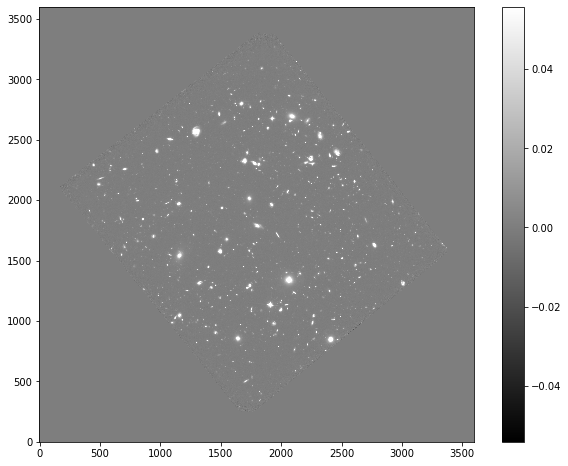

In [5]:
m, s = np.mean(image_data), np.std(image_data)
plt.imshow(image_data, interpolation='nearest', cmap='gray', vmin = m-s, vmax=m+s, origin = 'lower')
plt.colorbar();
plt.savefig('image.png', bbox_inches='tight', dpi =600)

In [6]:
image_data = image_data.byteswap().newbyteorder()
bkg = sep.Background(image_data)

In [7]:
bkg = sep.Background(image_data, bw=64, bh=64, fw=3, fh=3)

In [8]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [9]:
bkg_image = bkg.back()

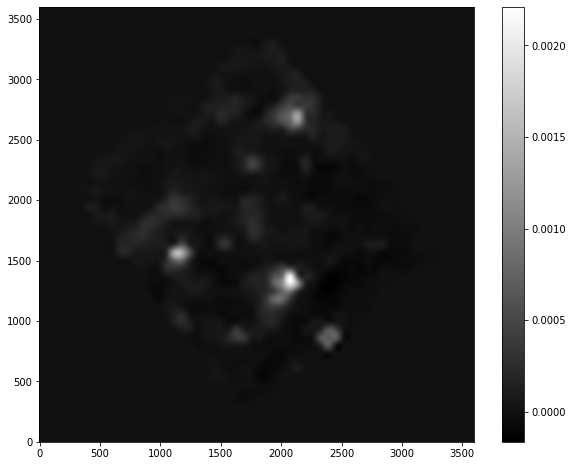

In [10]:
plt.imshow(bkg_image,interpolation='nearest',cmap='gray',origin='lower')
plt.colorbar();
plt.savefig('background.png', bbox_inches='tight', dpi =600)

In [11]:
bkg_rms = bkg.rms()

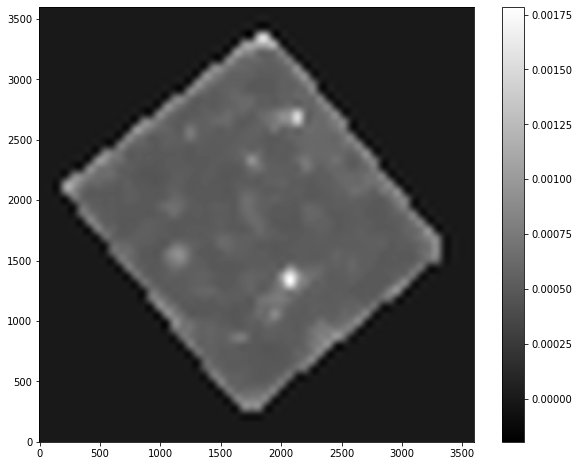

In [12]:
plt.imshow(bkg_rms, interpolation='nearest',cmap='gray',origin='lower')
plt.colorbar();
plt.savefig('background_noise.png', bbox_inches='tight', dpi =600)

In [13]:
data_sub = image_data - bkg

In [14]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [15]:
len(objects)

8640

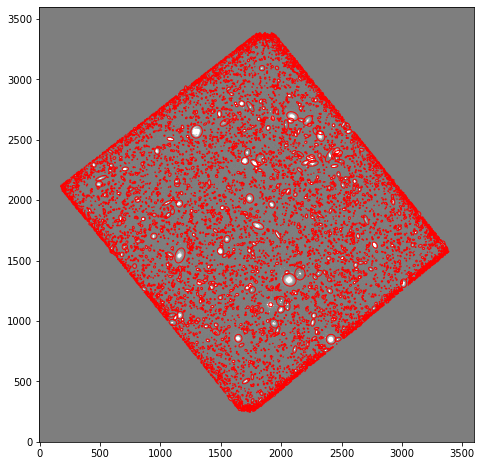

In [16]:
from matplotlib.patches import Ellipse

#plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest',cmap='gray',vmin=m-s,vmax=m+s,origin='lower')

#plot an ellipse for each object
for i in range (len(objects)):
    e = Ellipse(xy=(objects['x'][i],objects['y'][i]),
               width=6*objects['a'][i],
               height=6*objects['b'][i],
               angle=objects['theta'][i]*180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('image-bkg.png', bbox_inches='tight', dpi =600)

In [17]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [18]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'],objects['y'],3.0,err=bkg.globalrms,gain=1.0)

In [19]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


(array([8.63e+03, 7.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([ -1.06136543,  39.35656702,  79.77449947, 120.19243192,
        160.61036437, 201.02829682, 241.44622927, 281.86416172,
        322.28209417, 362.70002662, 403.11795907, 443.53589152,
        483.95382397, 524.37175642, 564.78968887, 605.20762132,
        645.62555377, 686.04348622, 726.46141867, 766.87935112,
        807.29728357]),
 <BarContainer object of 20 artists>)

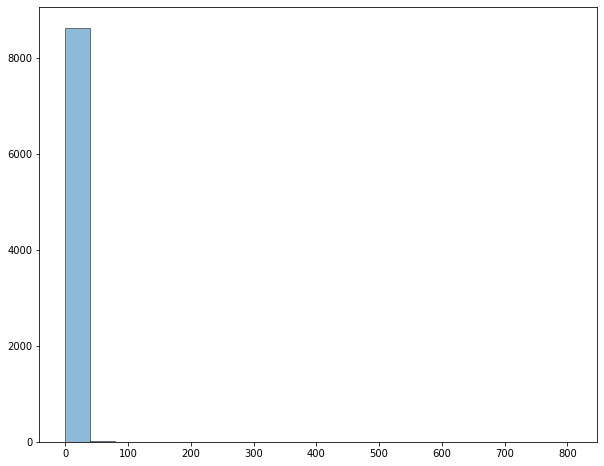

In [20]:
plt.hist(flux, bins=20,alpha=0.5,edgecolor='black')

In [21]:
mean = np.mean(flux)
median = np.median(flux)
sdv = np.std(flux)
print(f"The mean of the flux = {mean}.\nThe median of the flux = {median}\nThe standard deviation of the flux = {sdv}")

The mean of the flux = 0.36185728037707154.
The median of the flux = 0.030960064365426664
The standard deviation of the flux = 9.243528029706706


There are no outliers in the shown distribution. The flux is a 1-d array so there aren't any bars with only the flux. The flux error has some bars to the right, but none would be an outlier. 

In [22]:
data_2 = download_file('https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')

In [24]:
data_3 = download_file('https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits')

In [33]:
hdu_2 = astropy.io.fits.open(data_2)
hdu_3 = astropy.io.fits.open(data_3)

In [34]:
image_data_2 = hdu_2[0].data
image_data_3 = hdu_3[0].data

In [38]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2.
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m*100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp,vpmin,vpmax

def fits_quicklook(data,fnx=10,fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp,vpmin,vpmax = rescale_image(data)
    plt.imshow(pdata_tmp,vmin=vpmin,vmax=vpmax)

In [43]:
data_1_res, d1min, d1max = rescale_image(image_data)
data_2_res, d2min, d2max = rescale_image(image_data_2)
data_3_res, d3min, d3max = rescale_image(image_data_3)

In [45]:
data_1_res[data_1_res<d1min] = d1min
data_1_res[data_1_res>d1max] = d1max
data_2_res[data_2_res<d1min] = d2min
data_2_res[data_2_res>d1max] = d2max
data_3_res[data_3_res<d1min] = d3min
data_3_res[data_3_res>d1max] = d3max

In [46]:
rgb = np.zeros((data_1_res.shape[0], data_1_res.shape[1],3))
rgb[:,:,0] = (data_1_res-d1min)/(d1max-d1min)
rgb[:,:,1] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,2] = (data_3_res-d3min)/(d3max-d3min)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


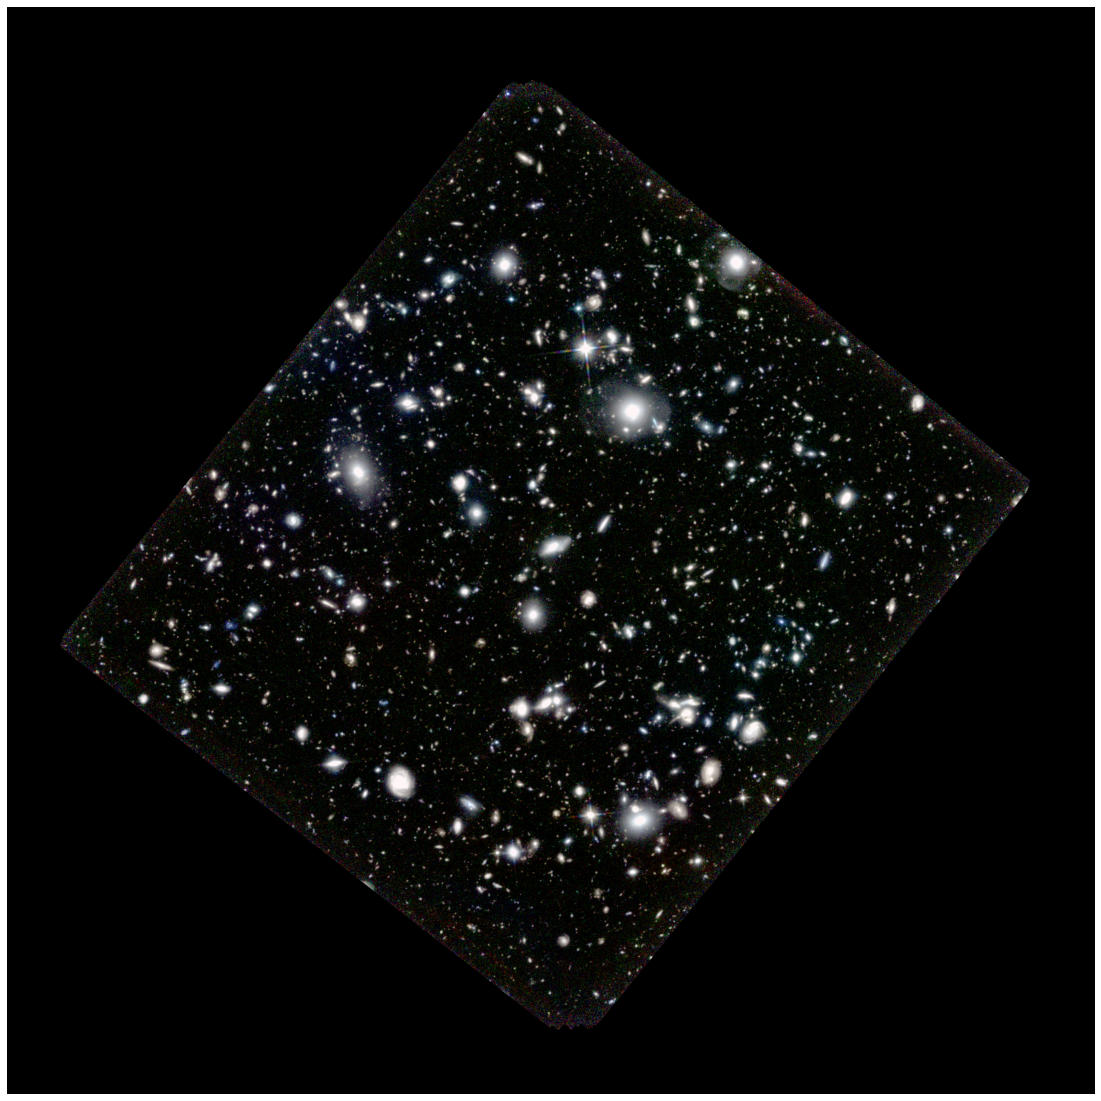

In [47]:
f, ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)